# Machine Learning
## import libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Bereinigen

In [2]:
def price_to_float(price):
    price = float(price.replace('$','').replace(',',''))
    # price = price * 0,9
    return price

In [3]:
def outlier(df, column):
    df[column] = df[column]._get_numeric_data()
    q1 = df[column].quantile(0.25)
    print(q1)
    q3 = df[column].quantile(0.75)
    print(q3)
    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)

    df = df.drop(df[df[column] < lower_bound].index)
    df = df.drop(df[df[column] > upper_bound].index)
            
    
    return(df)

In [4]:
listings = pd.read_csv('~/studies/analytics/listings.csv')
original = listings.copy()
listings.dropna()
listings.shape
listings['price'] = listings['price'].map(price_to_float)
listings['price']
df = listings[['beds', 'bedrooms', 'room_type', 'price', 'property_type']]
df.dropna()

,beds,bedrooms,room_type,price,property_type
0,1.0,1.0,Private room,21.0,Apartment
1,2.0,1.0,Entire home/apt,60.0,Guesthouse
2,2.0,1.0,Entire home/apt,90.0,Apartment
3,1.0,1.0,Private room,28.0,Apartment
4,1.0,1.0,Entire home/apt,125.0,Loft
...,...,...,...,...,...
24417,1.0,1.0,Private room,54.0,Apartment
24418,0.0,0.0,Entire home/apt,60.0,Condominium
24419,1.0,0.0,Private room,36.0,Apartment
24420,2.0,1.0,Private room,50.0,Apartment


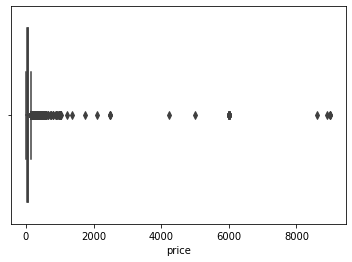

In [5]:
df = df[df['beds'].notna() == True]
df = df[df['bedrooms'].notna() == True]
sns.boxplot(x=df.price)

33.0
75.0
1.0
2.0
1.0
1.0


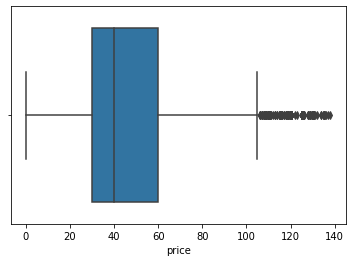

In [6]:
df = outlier(df, 'price')
df = outlier(df, 'beds')
df = outlier(df, 'bedrooms')
sns.boxplot(x=df.price)

#### property_type

In [7]:
property_count = original.property_type.value_counts().to_dict()
property_count

{'Apartment': 21657,
 'Condominium': 651,
 'House': 477,
 'Loft': 469,
 'Serviced apartment': 315,
 'Hostel': 190,
 'Townhouse': 117,
 'Boutique hotel': 88,
 'Hotel': 87,
 'Guest suite': 71,
 'Guesthouse': 61,
 'Bed and breakfast': 52,
 'Other': 34,
 'Bungalow': 25,
 'Villa': 17,
 'Houseboat': 17,
 'Boat': 17,
 'Aparthotel': 12,
 'Tiny house': 12,
 'Camper/RV': 10,
 'Cottage': 8,
 'Cabin': 8,
 'Pension (South Korea)': 8,
 'Barn': 4,
 'Castle': 3,
 'Treehouse': 3,
 'Resort': 2,
 'Casa particular (Cuba)': 2,
 'Cave': 1,
 'Earth house': 1,
 'Vacation home': 1,
 'Tipi': 1,
 'Lighthouse': 1}

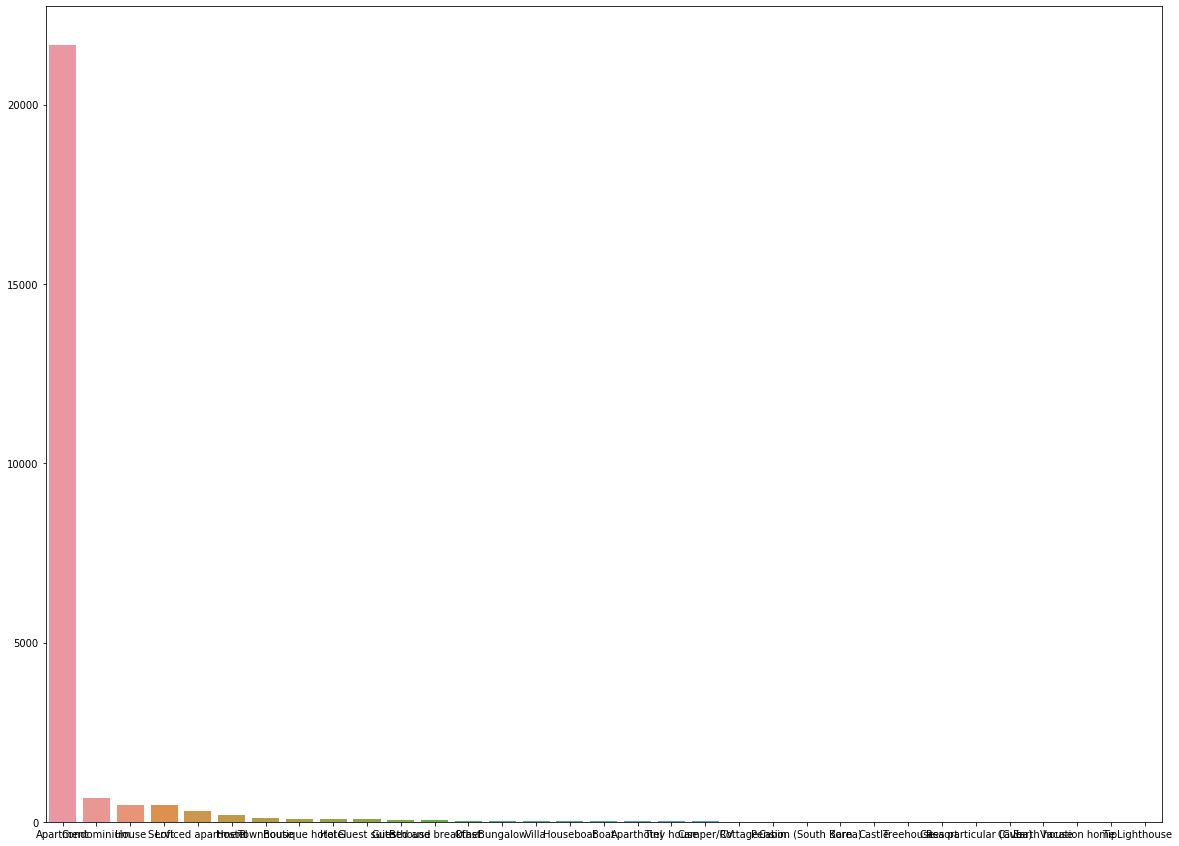

In [8]:
plt.figure(figsize=(20,15))
sns.barplot(list(property_count.keys()), list(property_count.values()))

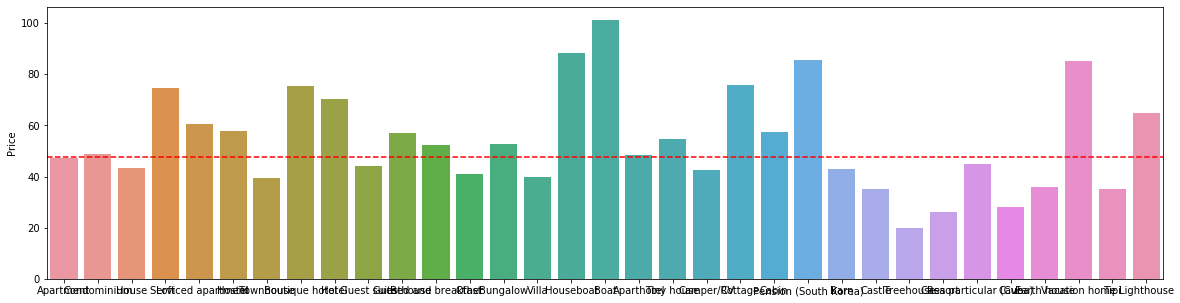

In [9]:
# average price
avg = df.price.mean()
# average price per property_type
avg_price = dict()
for i in property_count.keys():
    sum_price = 0
    for p in df.price[df['property_type'] == i]:
        sum_price = sum_price + p
    avg_price[i] = sum_price / len(df.price[df['property_type'] == i])
# plot
plt.figure(figsize=(20,5))
plt.ylabel('Price')
# average price per property_type
g = sns.barplot(list(avg_price.keys()), list(avg_price.values()))
# average price
ax1 = g.axes
ax1.axhline(avg, ls='--', color='red')
plt.show()

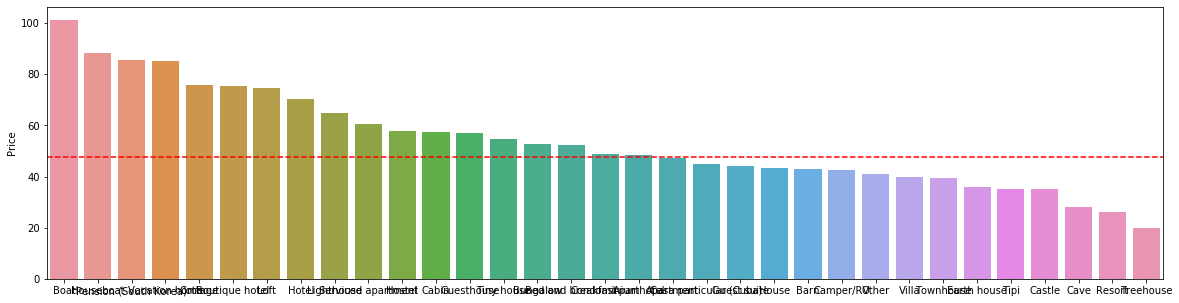

In [10]:
import collections
sorted_avg = reversed(sorted(avg_price.items(), key=lambda kv: kv[1]))
sorted_dict = collections.OrderedDict(sorted_avg)
# plot
plt.figure(figsize=(20,5))
plt.ylabel('Price')
# average price per property_type
g = sns.barplot(list(sorted_dict.keys()), list(sorted_dict.values()))
# average price
ax1 = g.axes
ax1.axhline(avg, ls='--', color='red')
plt.show()

In [11]:
df.price.max()

138.0

In [12]:
def categorize_by_avg_price(df, avg_price, avg):
    very_low = ['very_low']
    low = ['low']
    high = ['high']
    very_high = ['very_high']
    categories = [very_low, low, high, very_high] 
    for i in avg_price:
        if avg_price[i] < (avg/2): very_low.append(i)
        elif avg_price[i] < avg: low.append(i)
        elif avg_price[i] > (avg + 1.5): very_high.append(i)
        elif avg_price[i] > avg: high.append(i)
    for d in df['property_type']:        
        for c in categories:
            if d in c:
                df['property_type'][df['property_type'] == d] = c[0]
    return df
            

In [13]:
df = categorize_by_avg_price(df, avg_price, avg)

/Users/d064689/studies/analytics/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [14]:
df

,beds,bedrooms,room_type,price,property_type
0,1.0,1.0,Private room,21.0,low
1,2.0,1.0,Entire home/apt,60.0,very_high
2,2.0,1.0,Entire home/apt,90.0,low
3,1.0,1.0,Private room,28.0,low
4,1.0,1.0,Entire home/apt,125.0,very_high
...,...,...,...,...,...
24414,1.0,1.0,Private room,27.0,low
24415,1.0,1.0,Entire home/apt,40.0,low
24416,1.0,1.0,Entire home/apt,40.0,low
24417,1.0,1.0,Private room,54.0,low


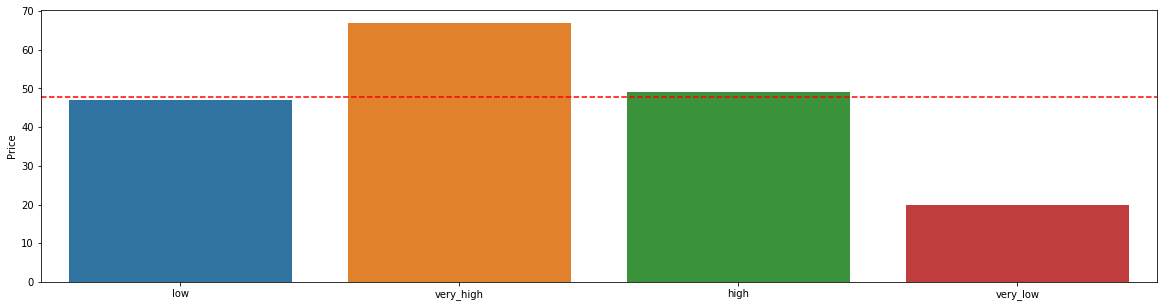

In [15]:
property_count = df.property_type.value_counts().to_dict()
avg_price_cat = dict()
for i in property_count.keys():
    sum_price = 0
    for p in df.price[df['property_type'] == i]:
        sum_price = sum_price + p
    avg_price_cat[i] = sum_price / len(df.price[df['property_type'] == i])
# plot
plt.figure(figsize=(20,5))
plt.ylabel('Price')
# average price per property_type
g = sns.barplot(list(avg_price_cat.keys()), list(avg_price_cat.values()))
# average price
ax1 = g.axes
ax1.axhline(avg, ls='--', color='red')
plt.show()

In [16]:
df = pd.get_dummies(data=df, columns=['room_type'], drop_first=True)
df = pd.get_dummies(data=df, columns=['property_type'], drop_first=False)

In [17]:
df

,beds,bedrooms,price,room_type_Hotel room,room_type_Private room,room_type_Shared room,property_type_high,property_type_low,property_type_very_high,property_type_very_low
0,1.0,1.0,21.0,0,1,0,0,1,0,0
1,2.0,1.0,60.0,0,0,0,0,0,1,0
2,2.0,1.0,90.0,0,0,0,0,1,0,0
3,1.0,1.0,28.0,0,1,0,0,1,0,0
4,1.0,1.0,125.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
24414,1.0,1.0,27.0,0,1,0,0,1,0,0
24415,1.0,1.0,40.0,0,0,0,0,1,0,0
24416,1.0,1.0,40.0,0,0,0,0,1,0,0
24417,1.0,1.0,54.0,0,1,0,0,1,0,0


## Trainings-/Testdaten

In [18]:
X = df.drop(columns=['price'])
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)
y_train_scaled = min_max_scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = min_max_scaler.fit_transform(y_test.reshape(-1,1))

## k-nearest-neighbor

In [19]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_scaled, y_train_scaled)
y_pred = knn.predict(X_test_scaled)
mean_squared_error(y_test_scaled, y_pred)

0.04919239603477489

In [20]:
# pd.DataFrame(min_max_scaler.inverse_transform([y_pred[:,0]]),
#              min_max_scaler.inverse_transform([y_test_scaled[:,0]])).transpose()

## Linear Regression
#### Alle Features

In [21]:
reg = LinearRegression().fit(X_train_scaled, y_train_scaled)
reg.coef_

array([[ 7.64024307e-02, -3.09499995e+06,  6.16712504e-03,
        -1.85339064e-01, -2.33594729e-01, -8.76738493e+10,
        -8.76738493e+10, -8.76738493e+10, -8.76738493e+10]])

In [22]:
reg.intercept_

array([8.76738493e+10])

In [23]:
y_pred_lin = reg.predict(X_test_scaled)
mean_squared_error(y_test_scaled, y_pred_lin)

0.02124089531149721

#### Ein Feature

In [24]:
reg_single = LinearRegression().fit(X_train['beds'].to_numpy().reshape(-1,1), y_train)
y_pred_single = reg_single.predict(X_test['beds'].to_numpy().reshape(-1,1))
reg_single.coef_

array([8.62388277])

In [25]:
reg_single.intercept_

37.005659048657776

In [26]:
mean_squared_error(y_test, y_pred_single)

548.8408716230032

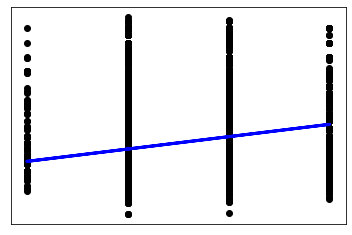

In [27]:
plt.scatter(X_train['beds'].to_numpy().reshape(-1,1), y_train, color = 'black')
plt.plot(X_test['beds'].to_numpy().reshape(-1,1), y_pred_single, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()